# Assignment 6: Classification

The objective of this assignment is to give you experience with classification using discriminant analysis and multiple logistic regression.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df_train = pd.read_csv("Shiva_train.csv")
df_test = pd.read_csv("Shiva_test.csv")

Use the training data `df_train` to create a data frame of independent variables `X_train` and a dependent variable column `y_train` of the measure of customer loyalty.  Do the same for the testing data `df_test`.

In [16]:
X_train = pd.DataFrame(df_train.iloc[:,1:10]) 
y_train = pd.DataFrame(df_train.iloc[:,10]) 
X_test = pd.DataFrame(df_test.iloc[:,1:10]) 
y_test = pd.DataFrame(df_test.iloc[:,10]) 

In [5]:
a=list(X_train.columns)
a

['Ads',
 'Price',
 'Place',
 'F_Quali',
 'S_Quali',
 'Varie',
 'S_scape',
 'P_Faci',
 'Gifts']

Calculate F-scores for each of the independent variables.  What does this tell us about what features to use in classifying customers?  Based on these results, should you modify the specification of training data?  Why or why not?

In [17]:
print(' Variable\t  F-score\t    P > F\n', '-'*45)
for iv in list(X_train.columns):
    f_score = stats.f_oneway(df_train[iv][df_train['Loyalty'] == 1], 
                   df_train[iv][df_train['Loyalty'] == 2], 
                   df_train[iv][df_train['Loyalty'] == 3])
    print(' ' + '\t'.join([iv.ljust(7)] + \
                                [("%.4f" % x).rjust(10) for x in [f_score.statistic, f_score.pvalue]]))

 Variable	  F-score	    P > F
 ---------------------------------------------
 Ads    	  225.7171	    0.0000
 Price  	  834.2816	    0.0000
 Place  	  644.2620	    0.0000
 F_Quali	  164.1339	    0.0000
 S_Quali	  257.1569	    0.0000
 Varie  	  419.3651	    0.0000
 S_scape	  171.6483	    0.0000
 P_Faci 	  314.2736	    0.0000
 Gifts  	  314.4948	    0.0000


In [8]:
##   They are all significant,so we should not modify the training data
####X_train = pd.DataFrame(df_train[['Price','Place','Varie','P_Faci','Gifts']]) 
####y_train = pd.DataFrame(df_train.iloc[:,10])
####X_test = pd.DataFrame(df_test[['Price','Place','Varie','P_Faci','Gifts']]) 
####y_test = pd.DataFrame(df_test.iloc[:,10])

You are now ready to fit your models with `X_train` and `y_train`!  Then, use `X_test` to make loyalty predicitions for the individuals in the test data.  You'll want to generate crosstabs of the test observations `y_test` and the predicited values.

# Multinomial Logistic Regression

In [18]:
reg = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000).fit(X_train,y_train)

C:\Users\sherryshen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
results = pd.DataFrame({'predictions':reg.predict(X_test),
                        'probability':reg.predict_proba(X_test)[:,1],
                        'observations':y_test['Loyalty']})
results.head()

,predictions,probability,observations
0,2,0.876131,2
1,2,0.565326,2
2,2,0.876131,2
3,2,0.565326,2
4,2,0.876131,2


In [20]:
pd.crosstab(results.observations,results.predictions)

predictions,1,2,3
observations,,,
1,18,2,0
2,0,39,0
3,0,0,41


## Logistic Regression Coefficient

In [21]:
coef = pd.DataFrame(reg.coef_, columns = X_train.columns)
coef['Loyalty'] = [1,2,3]
coef = coef.melt(id_vars = 'Loyalty')
coef

,Loyalty,variable,value
0,1,Ads,0.688409
1,2,Ads,-0.083374
2,3,Ads,-0.605035
3,1,Price,-1.313170
4,2,Price,-1.408785
5,3,Price,2.721955
6,1,Place,-1.114714
7,2,Place,-0.309370
8,3,Place,1.424084
9,1,F_Quali,0.453060


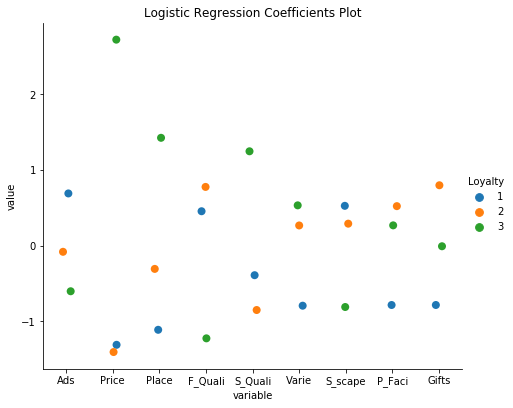

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.catplot(x='variable', y='value', hue='Loyalty', data=coef, height=6, aspect = 1.1, s=8)
plt.subplots_adjust(top=0.9)
plt.title("Logistic Regression Coefficients Plot")
plt.savefig("lr_coef.png")

# Linear Discriminant Analysis

In [24]:
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)

C:\Users\sherryshen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [27]:
results = pd.DataFrame({'predictions':model.predict(X_test),
                        'observations':y_test['Loyalty']})

In [28]:
pd.crosstab(results.observations,results.predictions)

predictions,1,2,3
observations,,,
1,15,5,0
2,1,37,1
3,0,0,41


## LDA clusters

In [29]:
cluster_means = pd.DataFrame(columns=[1,2,3])
for c, rows in df_test.groupby('Loyalty'):
    cluster_means[c] = rows.mean()
cluster_means

,1,2,3
ID,158.10,142.769231,398.048780
Ads,1.40,2.948718,3.243902
Price,1.20,3.000000,4.682927
Place,1.20,3.102564,4.365854
F_Quali,1.90,3.820513,3.951220
S_Quali,2.00,3.846154,4.170732
Varie,1.20,3.076923,4.146341
S_scape,2.05,3.769231,4.097561
P_Faci,1.20,3.076923,4.000000
Gifts,1.20,3.076923,3.951220


In [30]:
means = pd.DataFrame(model.means_, columns = X_train.columns)
means['Loyalty'] = [1,2,3]
means = means.melt(id_vars = 'Loyalty')
means

,Loyalty,variable,value
0,1,Ads,1.275000
1,2,Ads,1.751592
2,3,Ads,3.294479
3,1,Price,1.150000
4,2,Price,1.936306
5,3,Price,4.533742
6,1,Place,1.150000
7,2,Place,2.063694
8,3,Place,4.239264
9,1,F_Quali,1.775000


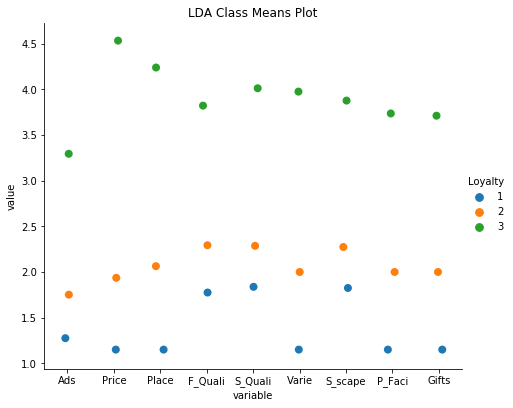

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.catplot(x='variable', y='value', hue='Loyalty', data=means, height=6, aspect = 1.1, s=8)
plt.subplots_adjust(top=0.9)
plt.title("LDA Class Means Plot")
plt.savefig("lda_means.png")

In [32]:
coef = pd.DataFrame(model.coef_, columns = X_train.columns)
coef['Loyalty'] = [1,2,3]
coef = coef.melt(id_vars = 'Loyalty')
coef

,Loyalty,variable,value
0,1,Ads,0.904304
1,2,Ads,0.685807
2,3,Ads,-1.104393
3,1,Price,-4.905587
4,2,Price,-3.836535
5,3,Price,6.102963
6,1,Place,-1.755289
7,2,Place,-0.140726
8,3,Place,0.997037
9,1,F_Quali,2.336430


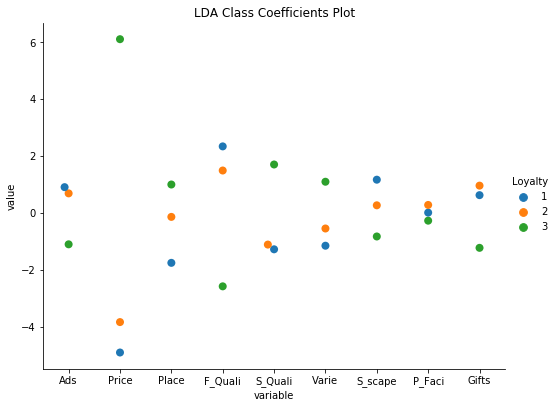

In [33]:
import seaborn as sns

sns.catplot(x='variable', y='value', hue='Loyalty', data=coef, height=6, aspect = 1.2, s=8,kind='swarm')
plt.subplots_adjust(top=0.9)
plt.title("LDA Class Coefficients Plot")
plt.savefig("lda_coef.png")

# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [35]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [36]:
results = pd.DataFrame({'predictions':clf.predict(X_test),
                        'observations':y_test['Loyalty']})

In [37]:
pd.crosstab(results.observations,results.predictions)

predictions,1,2,3
observations,,,
1,20,0,0
2,0,39,0
3,0,0,41


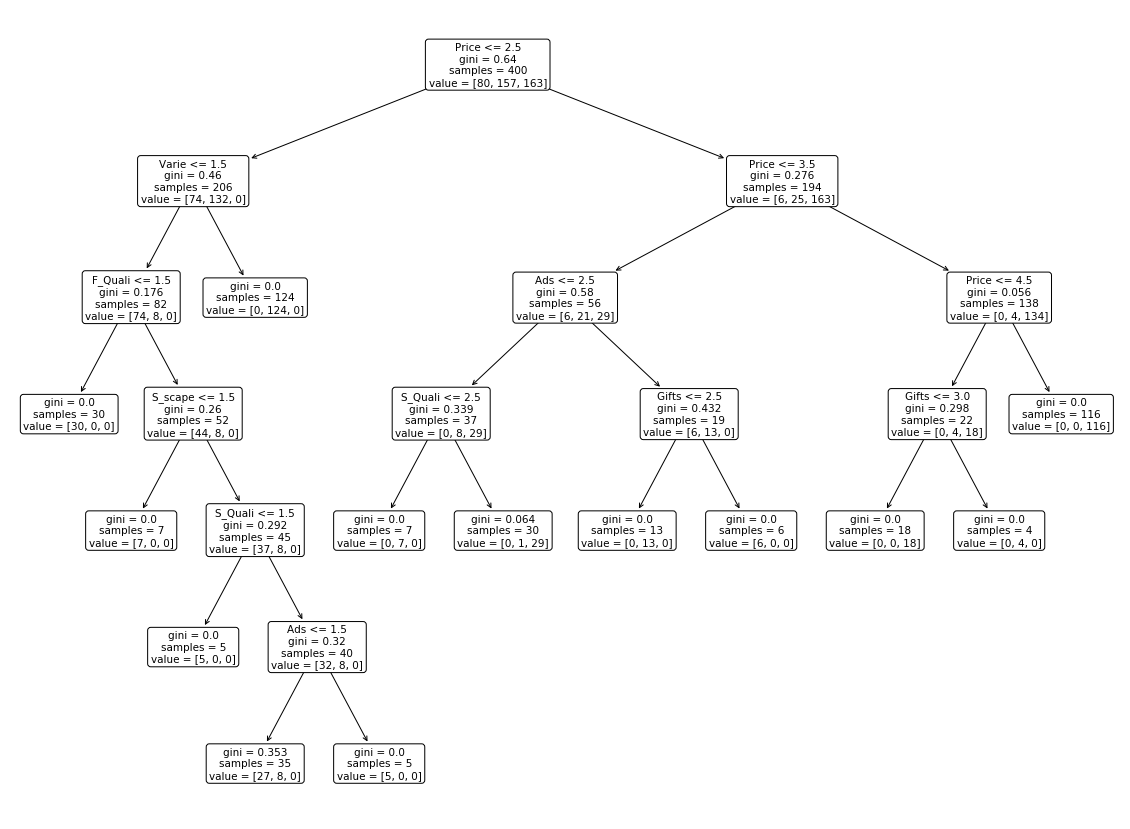

In [38]:
plt.figure(figsize = (20,15))
plot_tree(clf, feature_names = X_train.columns, label = 'all', rounded = True)
plt.savefig("tree.png")